In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [2]:
data = pd.read_csv("data.csv")
col = data["desc"]
col.head()

0    reliance-jio-and-mobikwik-money-deducted-but-p...
1    vodafone-reliance-jio-airtel-pathetic-data-net...
2    reliance-jio-network-poor-internet-speed-c1803357
3    reliance-jio-mobile-service-no-network-coverag...
4    reliance-jio-tower-removal-of-mobile-tower-in-...
Name: desc, dtype: object

In [3]:
for j in range(4874):
    temp = col[j].split("-")
    temp2=""
    for i in temp:
        temp2 += str(i) + " "
    col[j] = temp2[:-1]

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
col

0       reliance jio and mobikwik money deducted but p...
1       vodafone reliance jio airtel pathetic data net...
2       reliance jio network poor internet speed c1803357
3       reliance jio mobile service no network coverag...
4       reliance jio tower removal of mobile tower in ...
                              ...                        
4869    reliance jio infocomm recharge not success c17...
4870                        reliance jio infocomm b115543
4871    reliance jio infocomm regarding delivery of my...
4872                        reliance jio infocomm b115543
4873    reliance jio infocomm recharge jio using icici...
Name: desc, Length: 4874, dtype: object

In [5]:
for i in range(4874):
    col[i]= col[i].replace('reliance', '')
    col[i]= col[i].replace('jio', '')
    col[i]= col[i].replace('infocomm', '')
    col[i]= col[i].replace('pre', '')
    col[i]= col[i].replace('removal', '')
    col[i]= col[i].lower()
    col[i]= ''.join([i for i in col[i] if not i.isdigit()])

stop_words = set(stopwords.words('english')) 
    
for i in range(4874):
    word_tokens = word_tokenize(col[i])
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words: 
            filtered_sentence.append(w)
        col[i] = filtered_sentence

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

In [6]:
for i in range(4874):
    temp=""
    for k in col[i]:
        temp = temp + k + " "
    col[i] = temp
for i in range(4874):
    col[i]=col[i][0:-3]

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


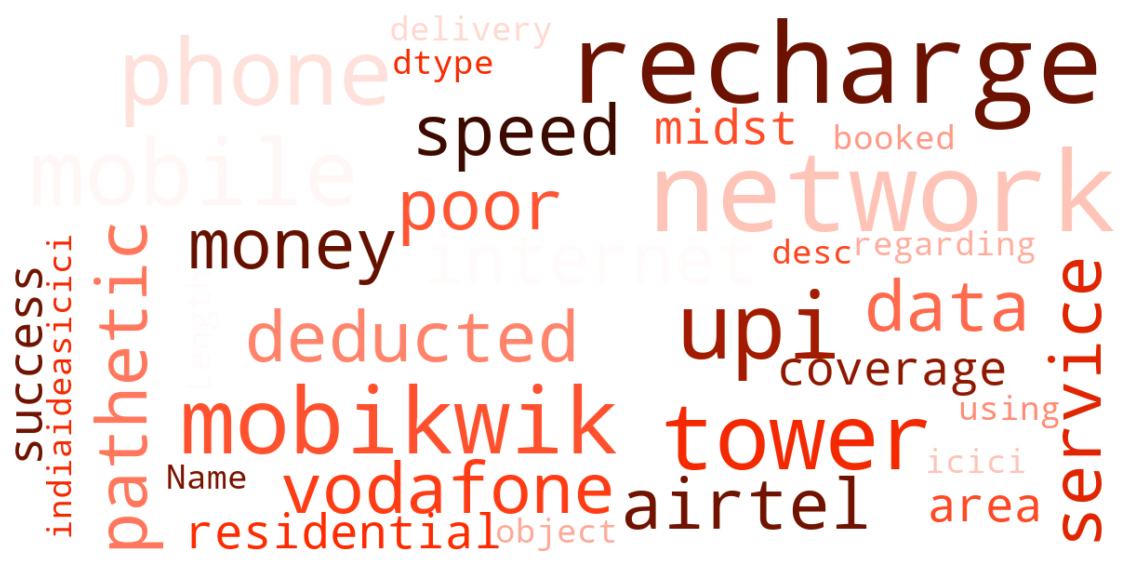

In [7]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(10, 100)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")
    plt.show()
    
# print wordcloud
show_wordcloud(col)